In [2]:
import pandas as pd  
import numpy as np

In [3]:
data = pd.read_csv('housing_price_dataset.csv')

In [4]:
my_df = pd.DataFrame(data)
my_df


,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [6]:
my_df.dtypes

SquareFeet        int64
Bedrooms          int64
Bathrooms         int64
Neighborhood     object
YearBuilt         int64
Price           float64
dtype: object

In [9]:
one_hot_encoded=pd.get_dummies(my_df['Neighborhood'])
one_hot_encoded=one_hot_encoded.astype(int)
my_df=pd.concat([my_df,one_hot_encoded],axis=1)
print(my_df)

       SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price  \
0            2126         4          1        Rural       1969  215355.283618   
1            2459         3          2        Rural       1980  195014.221626   
2            1860         2          1       Suburb       1970  306891.012076   
3            2294         2          1        Urban       1996  206786.787153   
4            2130         5          2       Suburb       2001  272436.239065   
...           ...       ...        ...          ...        ...            ...   
49995        1282         5          3        Rural       1975  100080.865895   
49996        2854         2          2       Suburb       1988  374507.656727   
49997        2979         5          3       Suburb       1962  384110.555590   
49998        2596         5          2        Rural       1984  380512.685957   
49999        1572         5          3        Rural       2011  221618.583218   

       Rural  Suburb  Urban

In [10]:
df=my_df.drop(columns=["Neighborhood"])

In [11]:
df

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Rural,Suburb,Urban
0,2126,4,1,1969,215355.283618,1,0,0
1,2459,3,2,1980,195014.221626,1,0,0
2,1860,2,1,1970,306891.012076,0,1,0
3,2294,2,1,1996,206786.787153,0,0,1
4,2130,5,2,2001,272436.239065,0,1,0
...,...,...,...,...,...,...,...,...
49995,1282,5,3,1975,100080.865895,1,0,0
49996,2854,2,2,1988,374507.656727,0,1,0
49997,2979,5,3,1962,384110.555590,0,1,0
49998,2596,5,2,1984,380512.685957,1,0,0


In [12]:
X = df.drop(['Price'], axis =1)
y = df['Price']
X.shape , y.shape

((50000, 7), (50000,))

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("Training set shape: ", X_train.shape, y_train.shape)
print("Testing set shape: ", X_test.shape, y_test.shape)

Training set shape:  (40000, 7) (40000,)
Testing set shape:  (10000, 7) (10000,)


In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = lr.predict(X_test)
y_pred.shape

(10000,)

In [26]:
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
mse = mean_squared_error(y_test, y_pred,squared=False)
print("Mean Squared Error: ", mse)

score = lr.score(X_train, y_train)
print("R-squared score:", score)

Mean Squared Error:  49358.376911191546
R-squared score: 0.5688921898995294


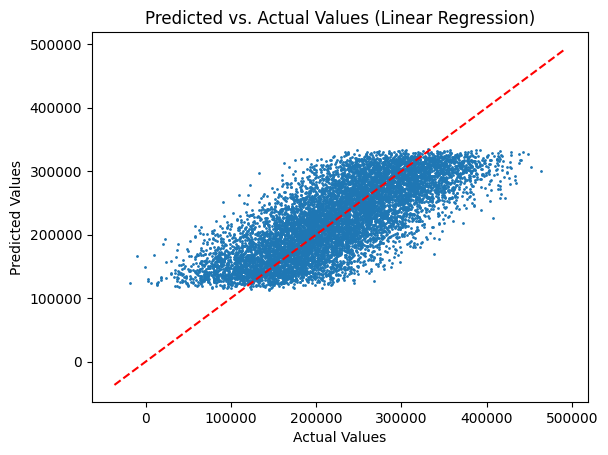

In [34]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,s=1)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values (Linear Regression)")
plt.show()